In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns #for Plotting Graphs
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
covid=pd.read_csv('covid_dataset.csv')
covid

,Case_No,Gender,Age,S1_Cough,S2_Fever,S3_Dyspnea,S4_Pneumonia,S5_Asthenia,pO2,Temperature,Contact_with_COVID_positive_patient,Swab_test_result,Risk_of_contracting_virus
0,1,M,80.0,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Positive,Yes
1,2,M,62.0,Yes,Yes,No,NaN,Yes,97.0,NaN,NaN,Positive,Yes
2,3,M,57.0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,Positive,Yes
3,4,M,45.0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,Positive,Yes
4,5,M,63.0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,M,57.0,Yes,Yes,Yes,Yes,NaN,90.0,39.0,No,Positive,Yes
63,64,M,74.0,No,No,No,Yes,NaN,94.0,NaN,Yes,Positive,Yes
64,65,F,71.0,No,Yes,Yes,NaN,NaN,93.0,NaN,Yes,Positive,Yes
65,66,M,83.0,Yes,Yes,No,NaN,NaN,95.0,NaN,NaN,Positive,Yes


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Case_No                              67 non-null     int64  
 1   Gender                               60 non-null     object 
 2   Age                                  63 non-null     float64
 3   S1_Cough                             67 non-null     object 
 4   S2_Fever                             67 non-null     object 
 5   S3_Dyspnea                           67 non-null     object 
 6   S4_Pneumonia                         14 non-null     object 
 7   S5_Asthenia                          8 non-null      object 
 8   pO2                                  27 non-null     float64
 9   Temperature                          12 non-null     float64
 10  Contact_with_COVID_positive_patient  29 non-null     object 
 11  Swab_test_result                  

## Visualization for Dataset before impuation

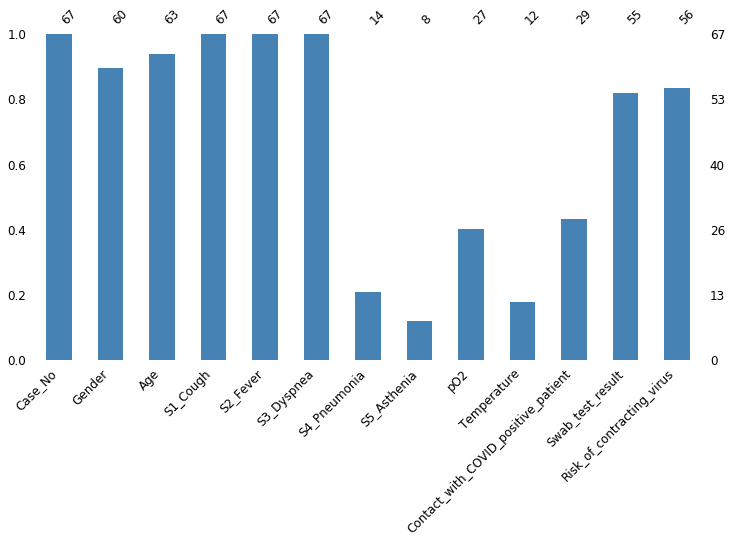

In [4]:
import missingno as msno
msno.bar(covid, figsize=(12, 6), fontsize=12, color='steelblue')

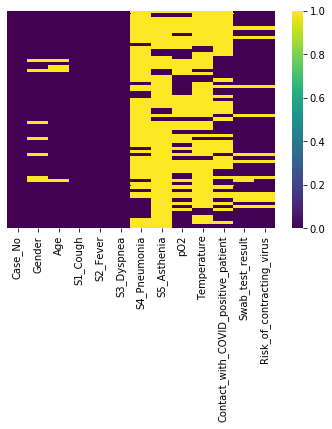

In [5]:
sns.heatmap(covid.isnull(),yticklabels=False,cmap='viridis')    ## Missing Values in the dataset

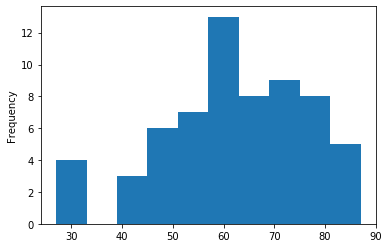

In [6]:
covid["Age"].plot.hist()

### From the above graph the max patients are from age group 60-70

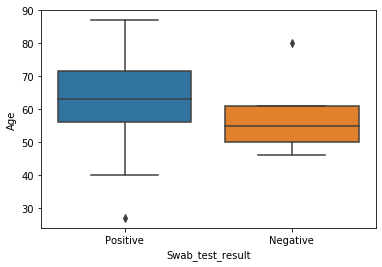

In [7]:
sns.boxplot(x="Swab_test_result", y="Age", data=covid)

### Max people are positive between age group 40-88

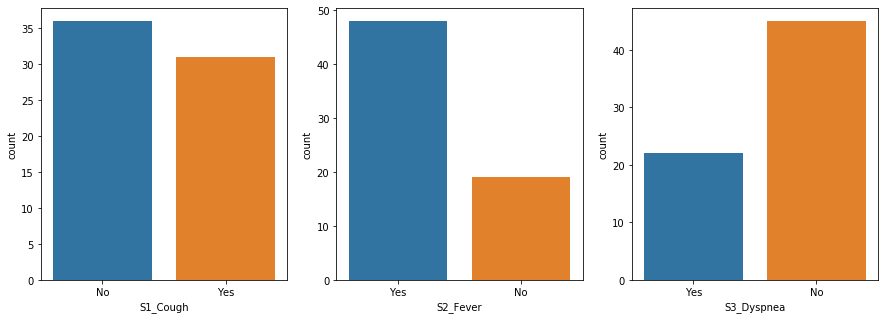

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x="S1_Cough",data=covid)
plt.subplot(1,3,2)
sns.countplot(x="S2_Fever",data=covid)
plt.subplot(1,3,3)
sns.countplot(x="S3_Dyspnea",data=covid)

In [9]:
covid.drop(['S4_Pneumonia','S5_Asthenia'],axis=1,inplace=True)

In [10]:
#Age 
covid['Age'].fillna(covid['Age'].median(),inplace=True)
covid.astype({'Age':'int32'})
# covid.Age.isnull().sum()

,Case_No,Gender,Age,S1_Cough,S2_Fever,S3_Dyspnea,pO2,Temperature,Contact_with_COVID_positive_patient,Swab_test_result,Risk_of_contracting_virus
0,1,M,80,No,Yes,Yes,NaN,NaN,NaN,Positive,Yes
1,2,M,62,Yes,Yes,No,97.0,NaN,NaN,Positive,Yes
2,3,M,57,Yes,Yes,No,NaN,NaN,NaN,Positive,Yes
3,4,M,45,Yes,Yes,No,NaN,NaN,NaN,Positive,Yes
4,5,M,63,Yes,Yes,No,NaN,NaN,NaN,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...
62,63,M,57,Yes,Yes,Yes,90.0,39.0,No,Positive,Yes
63,64,M,74,No,No,No,94.0,NaN,Yes,Positive,Yes
64,65,F,71,No,Yes,Yes,93.0,NaN,Yes,Positive,Yes
65,66,M,83,Yes,Yes,No,95.0,NaN,NaN,Positive,Yes


In [11]:
covid['pO2']=covid['pO2'].interpolate(limit_direction="backward")
covid['Temperature']=covid['Temperature'].interpolate(limit_direction="backward")

In [12]:
new_data=covid

In [13]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

In [14]:
# new_data.pO2 = imputer.fit_transform(new_data['pO2'].values.reshape(-1,1))[:,0]
# imputed_data=pd.DataFrame(imputer.fit_transform(new_data))

In [15]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

In [16]:
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
columns=['Gender','S1_Cough','S2_Fever','S3_Dyspnea','Contact_with_COVID_positive_patient','Swab_test_result','Risk_of_contracting_virus']
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
for columns in columns:
    encode(new_data[columns])

In [17]:
cols=['Gender','Contact_with_COVID_positive_patient','Swab_test_result','Risk_of_contracting_virus']
encode_data = pd.DataFrame(np.round(imputer.fit_transform(new_data.iloc[:,[1,8,9,10]])),columns = cols)
for c in cols:
  new_data[c]=encode_data[c]

In [18]:
new_data.astype({'Gender':int,'Contact_with_COVID_positive_patient':int,'Swab_test_result':int,'Risk_of_contracting_virus':int})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Case_No                              67 non-null     int64  
 1   Gender                               67 non-null     float64
 2   Age                                  67 non-null     float64
 3   S1_Cough                             67 non-null     float64
 4   S2_Fever                             67 non-null     float64
 5   S3_Dyspnea                           67 non-null     float64
 6   pO2                                  67 non-null     float64
 7   Temperature                          67 non-null     float64
 8   Contact_with_COVID_positive_patient  67 non-null     float64
 9   Swab_test_result                     67 non-null     float64
 10  Risk_of_contracting_virus            67 non-null     float64
dtypes: float64(10), int64(1)
memory us

In [19]:
new_data.to_csv()

',Case_No,Gender,Age,S1_Cough,S2_Fever,S3_Dyspnea,pO2,Temperature,Contact_with_COVID_positive_patient,Swab_test_result,Risk_of_contracting_virus\r\n0,1,1.0,80.0,0.0,1.0,1.0,97.0,37.5,1.0,1.0,1.0\r\n1,2,1.0,62.0,1.0,1.0,0.0,97.0,37.5,1.0,1.0,1.0\r\n2,3,1.0,57.0,1.0,1.0,0.0,91.05,37.5,1.0,1.0,1.0\r\n3,4,1.0,45.0,1.0,1.0,0.0,85.1,37.5,1.0,1.0,1.0\r\n4,5,1.0,63.0,1.0,1.0,0.0,79.15,37.5,1.0,1.0,1.0\r\n5,6,0.0,32.0,1.0,1.0,0.0,73.2,37.5,1.0,1.0,1.0\r\n6,7,1.0,43.0,1.0,1.0,0.0,67.25,37.5,1.0,1.0,1.0\r\n7,8,0.0,67.0,1.0,1.0,0.0,61.3,37.5,1.0,1.0,1.0\r\n8,9,0.0,73.0,0.0,1.0,0.0,68.64,37.5,1.0,1.0,1.0\r\n9,10,1.0,60.0,0.0,1.0,0.0,75.98,37.5,1.0,1.0,1.0\r\n10,11,1.0,55.0,0.0,1.0,0.0,83.32,37.5,1.0,1.0,1.0\r\n11,12,1.0,58.0,1.0,0.0,0.0,90.66,37.5,1.0,1.0,1.0\r\n12,13,0.0,61.0,1.0,1.0,0.0,98.0,37.8,1.0,0.0,1.0\r\n13,14,1.0,50.0,1.0,1.0,0.0,93.0,38.0,0.0,0.0,1.0\r\n14,15,0.0,46.0,0.0,0.0,0.0,98.0,38.199999999999996,1.0,0.0,1.0\r\n15,16,1.0,62.0,1.0,1.0,0.0,97.83333333333333,38.4,0.0,1.0,1.0\r\n16,17

## Visualization for Dataset before impuation

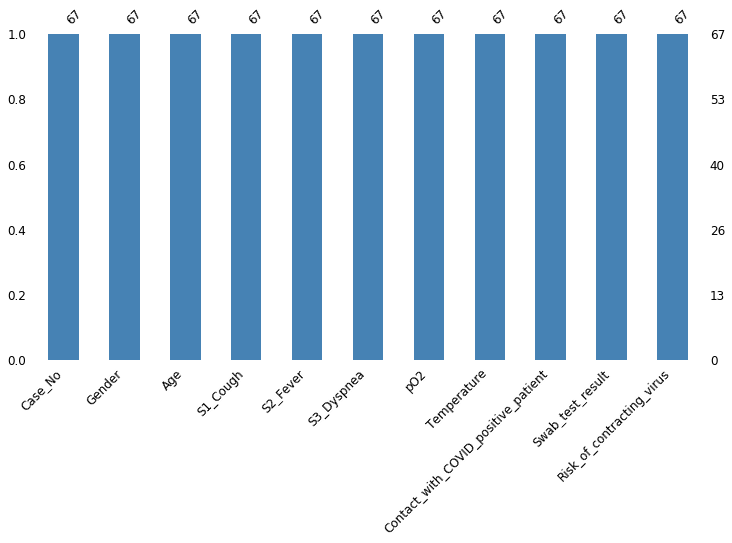

In [20]:
import missingno as msno
msno.bar(new_data, figsize=(12, 6), fontsize=12, color='steelblue')

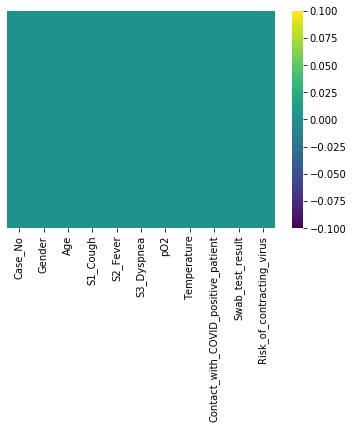

In [21]:
sns.heatmap(new_data.isnull(),yticklabels=False,cmap='viridis')    ## Missing Values in the dataset

### From the above 2 graphs we can conclude no any missing values are left to be filled.

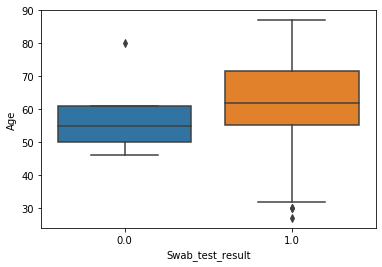

In [22]:
sns.boxplot(x="Swab_test_result", y="Age", data=new_data)

### After Filling we can observe the differece of values changes.

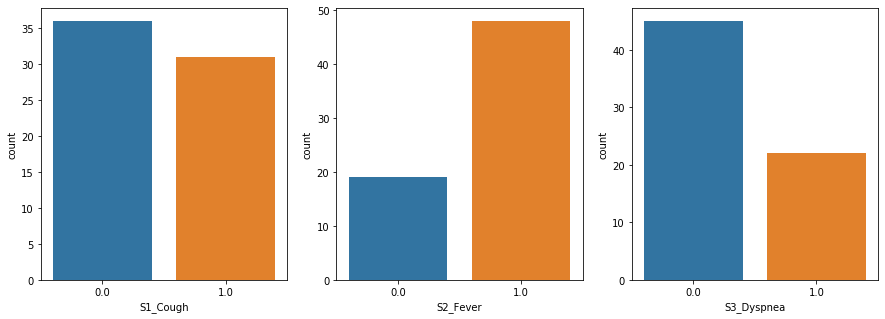

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x="S1_Cough",data=new_data)
plt.subplot(1,3,2)
sns.countplot(x="S2_Fever",data=new_data)
plt.subplot(1,3,3)
sns.countplot(x="S3_Dyspnea",data=new_data)

## Training & Testing of Data (Logistic Regre)

In [24]:
X=new_data.drop(["Contact_with_COVID_positive_patient","Case_No"],axis=1)
y=new_data["Contact_with_COVID_positive_patient"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel=LogisticRegression(max_iter=1000)

In [29]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions=logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
r = classification_report(y_test,predictions)
print(r)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.90      1.00      0.95        19

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



In [33]:
logmodel.score(X_test,y_test)

0.9047619047619048

Text(0, 0.5, 'Temprature Level')

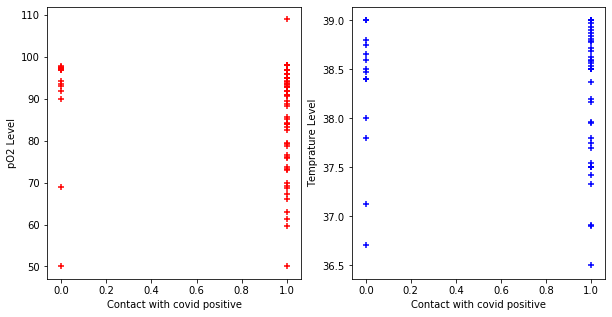

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(new_data.Contact_with_COVID_positive_patient,new_data.pO2,marker='+',color="red")
plt.xlabel("Contact with covid positive")
plt.ylabel("pO2 Level")
plt.subplot(1,2,2)
plt.scatter(new_data.Contact_with_COVID_positive_patient,new_data.Temperature,marker='+',color="blue")
plt.xlabel("Contact with covid positive")
plt.ylabel("Temprature Level")

### The first plot shows is how the pO2 affects the COVID-19 Patient condition.
### The second plot indicates the person with/without Covid temprature levels.

## To Calculate Accuracy

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predictions)

array([[ 0,  2],
       [ 0, 19]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [38]:
precision_score(y_test,predictions)

0.9047619047619048

In [39]:
recall_score(y_test,predictions)

1.0

In [40]:
f1_score(y_test,predictions)

0.9500000000000001

In [41]:
accuracy_score(y_test,predictions)

0.9047619047619048

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve
LROC = roc_auc_score(y_test,predictions)
fpr,tpr,threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

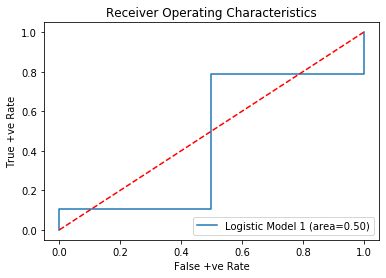

In [43]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Model 1 (area=%0.2f)" % LROC)
plt.plot([0,1],[0,1],"r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [44]:
print(logmodel.predict(([[0,55,1,1,1,59.6,38.625,1,0]])))

[1.]


In [45]:
print(X_test)

    Gender   Age  S1_Cough  S2_Fever  S3_Dyspnea        pO2  Temperature  \
62     1.0  57.0       1.0       1.0         1.0  90.000000    39.000000   
27     0.0  48.0       1.0       0.0         0.0  76.250000    37.750000   
53     0.0  65.0       1.0       0.0         0.0  69.000000    38.750000   
21     0.0  69.0       0.0       0.0         0.0  96.000000    36.500000   
26     0.0  58.0       0.0       1.0         1.0  73.125000    37.541667   
35     1.0  76.0       0.0       0.0         0.0  93.500000    37.950000   
2      1.0  57.0       1.0       1.0         0.0  91.050000    37.500000   
43     1.0  65.0       1.0       1.0         0.0  84.000000    38.500000   
49     0.0  55.0       1.0       1.0         1.0  59.600000    38.625000   
31     1.0  43.0       0.0       1.0         0.0  88.750000    38.583333   
59     1.0  70.0       0.0       1.0         0.0  96.000000    38.937500   
40     1.0  73.0       0.0       0.0         1.0  94.250000    38.500000   
57     1.0  

In [46]:
X_test.shape

(21, 9)

In [47]:
posi = new_data[new_data['Risk_of_contracting_virus']==1]
nega = new_data[new_data['Risk_of_contracting_virus']==0]

In [48]:
print(posi.shape,nega.shape)

(65, 11) (2, 11)


## Oversampling of the data

In [52]:
from imblearn.combine import SMOTETomek


In [53]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [54]:
X_res.shape,y_res.shape

((96, 9), (96,))

In [58]:
from collections import Counter
print("Original: {}".format(Counter(y)))
print("Resampled: {}".format(Counter(y_res)))

Original: Counter({1.0: 53, 0.0: 14})
Resampled: Counter({1.0: 48, 0.0: 48})


## Filling Unbalenced Dataset

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
os = RandomOverSampler(ratio=1)

In [61]:
X_train_res,y_train_res = os.fit_sample(X,y)

In [62]:
X_train_res.shape,y_train_res.shape

((106, 9), (106,))

In [63]:
print("Original: {}".format(Counter(y)))
print("Resampled: {}".format(Counter(y_res)))

Original: Counter({1.0: 53, 0.0: 14})
Resampled: Counter({1.0: 48, 0.0: 48})


## Training & Testing Over Resampled Data

In [64]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

In [65]:
logmodel.fit(X_train_1,y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions_1=logmodel.predict(X_test_1)

In [72]:
r = classification_report(y_test_1,predictions_1)
print(r)

              precision    recall  f1-score   support

         0.0       0.50      0.77      0.61        13
         1.0       0.67      0.38      0.48        16

    accuracy                           0.55        29
   macro avg       0.58      0.57      0.54        29
weighted avg       0.59      0.55      0.54        29



In [68]:
confusion_matrix(y_test_1,predictions_1)

array([[10,  3],
       [10,  6]], dtype=int64)

In [74]:
print(logmodel.predict(([[0,55,1,1,1,97.66666667,38.6,0,0]])))

[0.]
